In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory data Analysis
we will start by checking out some missing data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

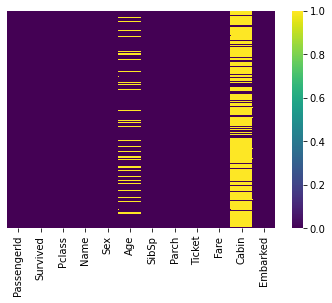

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
# cmap is for set the style of the graph 'viridis' is a style of colouring the graph
# yticklabels=False means we don't want to show the values on y axis
# if we want the values on the y axis then we can skip this parameter

<AxesSubplot:xlabel='Survived', ylabel='count'>

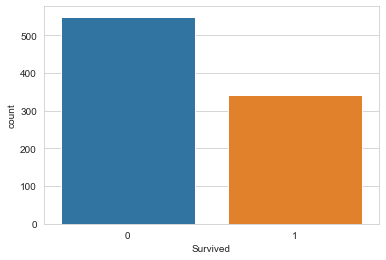

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

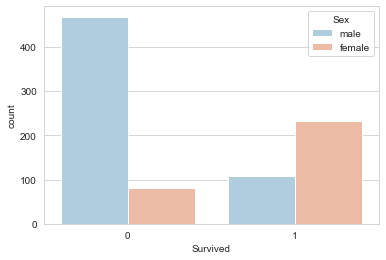

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')
# hue =sex is for ploting the raph on the basis of gender

<AxesSubplot:xlabel='Survived', ylabel='count'>

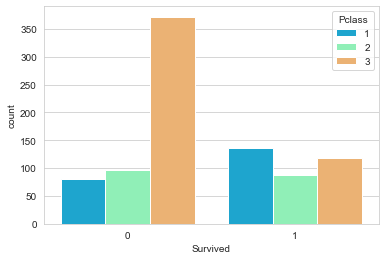

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

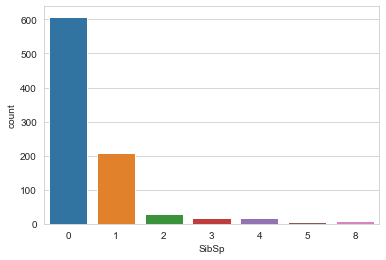

In [10]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

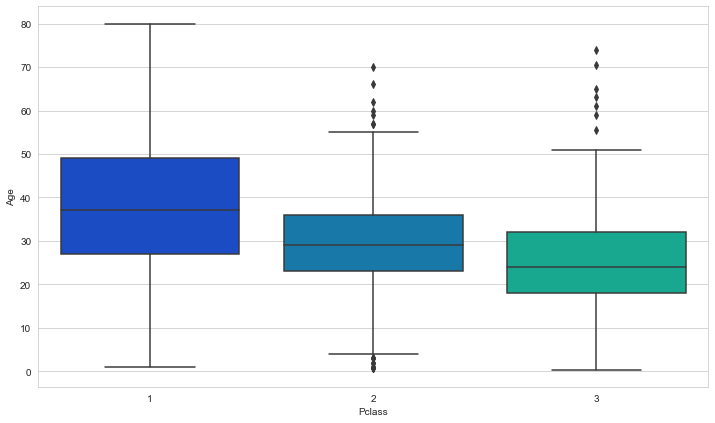

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# function for remove the null values|

In [12]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAssAAAGnCAYAAABB1hpnAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAAAj7klEQVR4nO3dfZBeZWE28OvZfCzsSkASkFpGTTDYUFsYmwl+kamWsMTECfqmImSWsqAdZDt2W6UBShIpamRCA5omgs64tgnUWqSRSUwhzTCmQk21lbyarrJq1IHIRz6AJEs3G/Z5/3DIWyongWSfPcnZ3+8vzj67z31tnj0P19573+fU6vV6PQAAwK9pKjsAAAAcrZRlAAAooCwDAEABZRkAAAooywAAUGB02QGKPPzww2lubi47BgAAFdff359zzjnnJR87astyc3NzpkyZUnYMAAAqrqenp/AxyzAAAKCAsgwAAAWUZQAAKKAsAwBAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACoxuxJMODAzk2muvzWOPPZampqbcdNNNGT16dK699trUarVMnjw5ixYtSlOTrg4AwNGrIWX5m9/8Zvbv35+vfOUrefDBB3PbbbdlYGAgXV1dOffcc7Nw4cJs2LAhM2bMaMTwAAAwJBpSlidOnJjnn38+g4OD2bNnT0aPHp2HH34406ZNS5JMnz49Dz74oLL8Mqxbty5r1qwpO8YrsnPnziTJySefXHKSV2b27NmZOXNm2TEAgKNIQ8pyS0tLHnvsscycOTO7du3K7bffnu985zup1WpJktbW1uzevfugz9Hf35+enp5GxDumbNu2LX19fWXHeEWefPLJJMlxxx1XcpJXZtu2bX7mAIAXaUhZ/vKXv5x3vvOd+djHPpZf/vKX+aM/+qMMDAwceHzv3r0ZN27cQZ+jubk5U6ZMaUS8Y8qUKVNy5ZVXlh3jFens7EySLF++vOQkAACHdrDJsobssBs3blxOOOGEJMmJJ56Y/fv356yzzsqmTZuSJBs3bszUqVMbMTQAAAyZhswsX3755bn++utz6aWXZmBgIH/2Z3+WN7/5zVmwYEGWLl2aSZMmpa2trRFDAwDAkGlIWW5tbc1nP/vZX/v4qlWrGjEcAAA0hAsdAwBAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkA4Ahs3749V199dXbs2FF2FBpAWQYAOALd3d3ZvHlzuru7y45CAyjLAACHafv27Vm7dm3q9XrWrl1rdrmClGUAgMPU3d2der2eJBkcHDS7XEHKMgDAYbr//vszMDCQJBkYGMh9991XciKGmrIMAHCYLrjggowZMyZJMmbMmLS1tZWciKGmLAMAHKaOjo7UarUkSVNTUzo6OkpOxFBTlgEADtOECRMya9as1Gq1zJo1K+PHjy87EkNsdNkBAACOZR0dHdm6datZ5YpSlgEAjsCECROyYsWKsmPQIJZhAABAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCOwPbt23P11Vdnx44dZUehAZRlAIAj0N3dnc2bN6e7u7vsKDSAsgxQEWa3YPht3749a9euTb1ez9q1a51/FdSQsnzPPfekvb097e3t+cAHPpDf+Z3fyfe///1ccsklufTSS7No0aIMDg42YmiAEcvsFgy/7u7u1Ov1JMng4KDzr4IaUpbf//73Z+XKlVm5cmV++7d/OzfccEOWL1+erq6u3HXXXanX69mwYUMjhgYYkcxuQTnuv//+DAwMJEkGBgZy3333lZyIodbQZRjf//738+Mf/zgXX3xxtmzZkmnTpiVJpk+fnoceeqiRQwOMKGa3oBwXXHBBxowZkyQZM2ZM2traSk7EUBvdyCe/44470tnZmSSp1+up1WpJktbW1uzevfugX9vf35+enp5GxqNB+vr6ksTrB8No3bp1L5rd+sY3vpFZs2aVnAqq753vfGfWrFnzomP//6uWhpXlZ599Nj/96U/z1re+NUnS1PT/J7H37t2bcePGHfTrm5ubM2XKlEbFo4FaWlqSxOsHw2jmzJlZs2ZNBgYGMmbMmLznPe9xDsIwmT17dlavXp33vve9B3oPx5aD/YLTsGUY3/nOd/L2t7/9wPFZZ52VTZs2JUk2btyYqVOnNmpogBGno6PjwF/vmpqa0tHRUXIiGDk6Ojpy9tlnO+8qqmFleevWrTn99NMPHM+fPz/Lli3LxRdfnIGBAWt6AIbQhAkTMmvWrNRqtcyaNSvjx48vOxKMGBMmTMiKFSucdxXVsGUYH/rQh150PHHixKxatapRwwGMeB0dHdm6davZLYAh1NANfgAMnxdmtwAYOu7gBwAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBKmL79u25+uqrs2PHjrKjAFSGsgxQEd3d3dm8eXO6u7vLjgJQGcoyQAVs3749a9euTb1ez9q1a80uAwwRZRmgArq7u1Ov15Mkg4ODZpcBhoiyDFAB999/fwYGBpIkAwMDue+++0pOBFANyjJABVxwwQUZM2ZMkmTMmDFpa2srORGMHDbXVpuyDFABHR0dqdVqSZKmpqZ0dHSUnAhGDptrq01ZBqiACRMmZNasWanVapk1a1bGjx9fdiQYEWyurT5lGaAiOjo6cvbZZ5tVhmFkc231KcsAFTFhwoSsWLHCrDIMI5trq09ZBgA4TDbXVp+yDABwmGyurT5lGQDgMNlcW33KMgDAEZgzZ05aWlpy0UUXlR2FBlCWAQCOwNe//vX09fVl9erVZUehAZRlAIDD5DrL1acsAwAcJtdZrj5lGQDgMLnOcvUpywAVsX379lx99dX+DAzDyHWWq09ZBqiI7u7ubN682Z+BYRi5znL1KcsAFWCTEZTDdZarT1kGqACbjKA8HR0dOfvss80qV5SyDFABNhkBNIayDFABNhlBeewXqDZlGaACbDKCctgvUH3KMkAF2GQE5bBfoPqUZYCKsMkIhp/9AtWnLAMAHCb7BaqvYWX5jjvuyMUXX5z3v//9+cd//Mf8/Oc/zyWXXJJLL700ixYtyuDgYKOGBhiRbDKC4We/QPU1pCxv2rQp3/ve9/L3f//3WblyZR5//PEsXrw4XV1dueuuu1Kv17Nhw4ZGDA0wItlkBOWwX6D6GlKWv/Wtb+XMM89MZ2dnrrrqqvz+7/9+tmzZkmnTpiVJpk+fnoceeqgRQwOMSDYZQXnsF6i20Y140l27dmXbtm25/fbb8+ijj+YjH/lI6vX6gT9TtLa2Zvfu3Qd9jv7+/vT09DQiHg3W19eXJF4/GEbr1q170Sajb3zjG5k1a1bJqWBkePrpp9PX15fe3t48+eSTZcdhiDWkLJ900kmZNGlSxo4dm0mTJqW5uTmPP/74gcf37t2bcePGHfQ5mpubM2XKlEbEo8FaWlqSxOsHw2jmzJn5+te/nsHBwTQ1NeU973mPcxCGyZIlS9Lb25tvfetb+fjHP152HA7DwSb4GrIM4/d+7/fyr//6r6nX63niiSfy3HPP5W1ve1s2bdqUJNm4cWOmTp3aiKEBRqQ5c+Yc2Dg9ODiYiy66qNxAMELYL1B9DSnL73rXuzJlypTMnTs3H/nIR7Jw4cLMnz8/y5Yty8UXX5yBgQGXVgEYQl//+tcPLHWr1WpZvXp1uYFghLBfoPpq9Rde4aNMT0+PPyEeozo7O5Mky5cvLzkJjBwzZszI3r17Dxy3trZm/fr1JSaCkcG5Vw0H651uSgJQAW6MAOVw7lWfsgxQAW6MAOVw7lWfsgxQAW6MAOVw7lVfQy4dB8Dw6+joyNatW81swTBz7lWbmWWAiti5c2d6e3uza9eusqPAiDJhwoSsWLHCrHJFKcsAFXHjjTdm7969WbRoUdlRACpDWQaogEceeSRbt25NkmzdujU//vGPS04EUA3KMkAF3HjjjS86NrsMMDSUZYAKeGFWuegYgMOjLANUwMSJEw96DMDhUZYBKuB/L7v438sygMbZvn17rr766uzYsaPsKDSAsgxQAWeeeeaB2eSJEyfmjW98Y8mJYOTo7u7O5s2b093dXXYUGkBZBqiIRYsWpbW11awyDKPt27dn7dq1qdfrWbt2rdnlClKWASrizDPPzPr1680qwzDq7u5OvV5PkgwODppdriBlGQDgMN1///0ZGBhIkgwMDOS+++4rORFDbXTZAQCOVuvWrcuaNWvKjvGy7dy5M0ly8sknl5zklZk9e3ZmzpxZdgw4LBdccEHWrFmTgYGBjBkzJm1tbWVHYoiZWQaoiB07dlgvCcOso6MjtVotSdLU1JSOjo6SEzHUzCwDFJg5c+YxNePZ2dmZJFm+fHnJSWDkmDBhQmbNmpXVq1dn1qxZGT9+fNmRGGLKMgDAEejo6MjWrVvNKleUsgwAcAQmTJiQFStWlB2DBrFmGQAACijLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKDA6LIDAAD8T+vWrcuaNWvKjvGy7dy5M0ly8sknl5zklZk9e3ZmzpxZdoyjnrIMAHAEduzYkeTYK8u8PA0ryxdddFFOOOGEJMnpp5+eq666Ktdee21qtVomT56cRYsWpanJKhAA4MVmzpx5TM14dnZ2JkmWL19echIaoSFlub+/P0mycuXKAx+76qqr0tXVlXPPPTcLFy7Mhg0bMmPGjEYMDwAAQ6IhU7s//OEP89xzz+WKK67IZZddlocffjhbtmzJtGnTkiTTp0/PQw891IihAQBgyDRkZvm4447LlVdemT/8wz/Mz372s3z4wx9OvV5PrVZLkrS2tmb37t0HfY7+/v709PQ0Ih4N1tfXlyRePxhmzj0oh3Ov2hpSlidOnJjXv/71qdVqmThxYk466aRs2bLlwON79+7NuHHjDvoczc3NmTJlSiPi0WAtLS1J4vWDYebcg3I49459B/tFpyHLMO6+++585jOfSZI88cQT2bNnT97xjndk06ZNSZKNGzdm6tSpjRgaAACGTENmlufOnZvrrrsul1xySWq1Wj796U/n1a9+dRYsWJClS5dm0qRJaWtra8TQh3Tbbbelt7e3lLFHihf+fV/YHUxjTJ48OV1dXWXHAIBKa0hZHjt2bP76r//61z6+atWqRgz3ivT29uY/Hu7JvlGvLTtKZTUNHp8k+bfvP1Nykuoa+/y2siMAwIgwIm9Ksm/Ua/PUiVeVHQMO2ynP3F52BAAYEdwVBAAACijLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKCAsgwAAAWUZQAAKKAsAwBAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABRQlgEAoMDLKss/+9nP8s1vfjOPP/546vV6ozMBAMBRYfShPmHVqlVZv359nnnmmVx00UX5xS9+kYULFw5HNgAAKNUhZ5bXrl2bL3/5yznhhBNy+eWXZ/PmzcORCwAASnfIsvzCsotarZYkGTt2bGMTAQDAUeKQyzBmzZqVefPmZdu2bfnwhz+c888/fzhyAQBA6Q5Zltvb2/P2t789jzzySCZNmpQ3velNw5ELAABKd8iyfN111x34740bN2bMmDE57bTTMm/evJx44omFX7djx468//3vz5e+9KWMHj061157bWq1WiZPnpxFixalqclV6wAAOLodsrH29/fn1FNPzXve85785m/+Zp544ons27cv8+fPL/yagYGBLFy4MMcdd1ySZPHixenq6spdd92Ver2eDRs2DN13AAAADXLImeWdO3dm6dKlSZLzzjsvV1xxRbq6ujJv3rzCr7n55pvzwQ9+MF/4wheSJFu2bMm0adOSJNOnT8+DDz6YGTNmHHTc/v7+9PT0vOxv5OXq6+sb8ueEMvT19TXkHOHY9cL7m58LGF7OvWo7ZFnes2dPfvKTn+SMM87IT37yk/T19WXXrl2FpfOee+7JySefnPPOO+9AWa7X6weuptHa2prdu3cfMlhzc3OmTJnySr6Xl6WlpSXJM0P+vDDcWlpaGnKOcOz61ftb/FzAMHPuHfsO9ovOIcvywoULc8011+TJJ5/Mcccdl/e97335xje+kauuuuolP/9rX/taarVa/u3f/i09PT2ZP39+du7ceeDxvXv3Zty4cYfxbQAAwPA65Jrl3/3d380nPvGJvP3tb89zzz2XHTt2ZN68eWlra3vJz7/zzjuzatWqrFy5MlOmTMnNN9+c6dOnZ9OmTUl+tUlw6tSpQ/tdAABAAxTOLO/bty9r167NnXfembFjx2bPnj3ZsGHDgU17r8T8+fOzYMGCLF26NJMmTSos2gAAcDQpLMvvfve7M3v27Nxyyy15wxvekA996EOvuCivXLnywH+vWrXq8FMCAEAJCsvyZZddljVr1uSxxx7L3LlzD9z2GgAARorCNct//Md/nHvvvTft7e1Zs2ZNfvCDH2TJkiV55JFHhjMfAACU5pAb/KZNm5YlS5Zk/fr1Oe200/IXf/EXw5ELAABK97LvOT1u3Li0t7dn9erVDYwDAABHj5ddlgEAYKRRlgEAoMAh7+BXNTt27MjY/U/mlGduLzsKHLax+7dlx479ZccAgMozswwAAAVG3Mzy+PHj88i20XnqxKvKjgKH7ZRnbs/48SeWHQMAKs/MMgAAFFCWAQCgwIhbhgGU47bbbktvb2/ZMSrthX/fzs7OkpNU3+TJk9PV1VV2DGAYKMvAsOjt7c13/++W7HvVKWVHqaxRz49Jkjz00ydLTlJtY/c8VXYEYBgpy8Cw2feqU/L4Of+n7BhwRE57+GtlRwCGkTXLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKCAsgwAAAWUZQAAKDC67AAAQOPcdttt6e3tLTtGpb3w79vZ2VlykuqbPHlyurq6hnVMZRkAKqy3tzff3fKD7DvlpLKjVNaoMbUkyUNPPlpykmob+9TTpYyrLANAxe075aQ8PvddZceAI3La3Q+UMq41ywAAUEBZBgCAAsoyAAAUUJYBAKBAQzb4Pf/887nhhhuydevWjBo1KosXL069Xs+1116bWq2WyZMnZ9GiRWlq0tUBADh6NaQsP/DAr3YrfuUrX8mmTZsOlOWurq6ce+65WbhwYTZs2JAZM2Y0YngAABgSDZnaPf/883PTTTclSbZt25YJEyZky5YtmTZtWpJk+vTpeeihhxoxNAAADJmGXWd59OjRmT9/ftavX5/Pfe5zeeCBB1Kr/eqi3a2trdm9e/dBv76/vz89PT1Dnquvr2/InxPK0NfX15BzpFGce1TJsXT+OfeokjLOvYbelOTmm2/Oxz/+8XzgAx9If3//gY/v3bs348aNO+jXNjc3Z8qUKUOeqaWlJckzQ/68MNxaWloaco40yq/OvT1lx4AhcSydfy0tLcmenWXHgCHRqHPvYAW8IcswVq9enTvuuCNJcvzxx6dWq+XNb35zNm3alCTZuHFjpk6d2oihAQBgyDRkZvmCCy7Iddddl3nz5mX//v25/vrrc8YZZ2TBggVZunRpJk2alLa2tkYMDRylduzYkbF7nsppD3+t7ChwRMbueSo7dowqOwYwTBpSlltaWvLZz3721z6+atWqRgwHAAAN0dA1ywAvGD9+fH70zPN5/Jz/U3YUOCKnPfy1jB8/vuwYwDBxVxAAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABQYkZeOG/v8tpzyzO1lx6ispsHdSZLBphNKTlJdY5/fluTEsmMAQOWNuLI8efLksiNUXm/vk0mSyZNPLzlJlZ3oZxkAhsGIK8tdXV1lR6i8zs7OJMny5ctLTgIAcGSsWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABQYcbe7BoCRZMeOHRn71NM57e4Hyo4CR2TsU09nx6jjh31cM8sAAFDAzDIAVNj48ePzo+efy+Nz31V2FDgip939QMaPHz/s45pZBgCAAmaWgWEzds9TOe3hr5Udo7JG7etLkjw/tqXkJNU2ds9TSU4tOwYwTJRlYFhMnjy57AiV19vbmySZPEmRa6xT/TzDCKIsA8Oiq6ur7AiV19nZmSRZvnx5yUkAqsOaZQAAKKAsAwBAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACgw5HfwGxgYyPXXX5/HHnss+/bty0c+8pG88Y1vzLXXXptarZbJkydn0aJFaWrS0wEAOLoNeVm+9957c9JJJ2XJkiXZtWtX3ve+9+W3fuu30tXVlXPPPTcLFy7Mhg0bMmPGjKEeGgAAhtSQl+ULL7wwbW1tB45HjRqVLVu2ZNq0aUmS6dOn58EHHzxkWe7v709PT89Qx2MY9PX1JYnXD4aZc4+X8sLPBVRBX1/fsL/HDXlZbm1tTZLs2bMnH/3oR9PV1ZWbb745tVrtwOO7d+8+5PM0NzdnypQpQx2PYdDS0pIkXj8YZs49XkpLS0uyZ2fZMWBItLS0NOQ97mAFvCELh3/5y1/msssuy5w5c/Le9773ReuT9+7dm3HjxjViWAAAGFJDXpa3b9+eK664Itdcc03mzp2bJDnrrLOyadOmJMnGjRszderUoR4WAACG3JCX5dtvvz3PPvtsVqxYkfb29rS3t6erqyvLli3LxRdfnIGBgRetaQYAgKPVkK9ZvuGGG3LDDTf82sdXrVo11EMBAEBDudgxAAAUUJYBAKDAkC/DAACOLmOfejqn3f1A2TEqa1TffydJnm85ruQk1Tb2qaeTU08f9nGVZQCosMmTJ5cdofJ6e3uTJJNLKHIjyqmnl/LzrCwDQIV1dXWVHaHyOjs7kyTLly8vOQmNYM0yAAAUUJYBAKCAsgwAAAWUZQAAKKAsAwBAAWUZAAAKKMsAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKCAsgwAAAWUZQAAKKAsAwBAAWUZAAAKNKwsb968Oe3t7UmSn//857nkkkty6aWXZtGiRRkcHGzUsAAAMGQaUpa/+MUv5oYbbkh/f3+SZPHixenq6spdd92Ver2eDRs2NGJYAAAYUg0py6973euybNmyA8dbtmzJtGnTkiTTp0/PQw891IhhAQBgSI1uxJO2tbXl0UcfPXBcr9dTq9WSJK2trdm9e/chn6O/vz89PT2NiEeD9fX1JYnXD4aZcw/K4dyrtoaU5f+tqen/T2Dv3bs348aNO+TXNDc3Z8qUKY2MRYO0tLQkidcPhplzD8rh3Dv2HewXnWG5GsZZZ52VTZs2JUk2btyYqVOnDsewAABwRIalLM+fPz/Lli3LxRdfnIGBgbS1tQ3HsAAAcEQatgzj9NNPz1e/+tUkycSJE7Nq1apGDQUAAA3hpiQAAFBAWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMAQAFlGQAACijLAABQQFkGAIACyjIAABRQlgEAoICyDAAABZRlAAAooCwDAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKDA6LIDAByt1q1blzVr1pQd42Xr7e1NknR2dpac5JWZPXt2Zs6cWXYMgJdkZhmgIo4//vjs2bMnzz77bNlRACrDzDJAgZkzZx5TM55tbW1JkieffDIrV64sOQ1ANZhZBqiAf//3f8/u3buTJLt37853v/vdkhMBVIOyDFABCxYseNHxX/7lX5aUBKBalGWACnhhVrnoGIDDoywDVMAJJ5xw0GMADo+yDFABN91004uOP/WpT5WUBKBalGWACjjppJMOegzA4VGWASrgxhtvfNHxokWLSkoCUC3KMkAFbN269aDHABweZRmgAiZOnHjQYwAOj7IMUAGXX375i46vvPLKcoIAVIzbXR/l1q1blzVr1pQd4xXp7e1NknR2dpac5JWZPXv2MXVrY/ifVqxY8aLjv/mbv8m73/3uktIAVIeyzJAbP3582RFgxHniiSdedPz444+XlASgWpTlo9zMmTPNdgIAlGTYyvLg4GA+8YlP5Ec/+lHGjh2bT37yk3n9618/XMMDVFpLS0v6+voOHLe2tpaYBo7MsbYE0fLDahu2DX7/8i//kn379uUf/uEf8rGPfSyf+cxnhmtogMr79Kc//aLjxYsXl5QERp7x48dbglhhwzaz/B//8R8577zzkiTnnHNOfvCDHxz08/v7+9PT0zMc0QCOeSeccEKam5vT39+f5ubmtLa2eg/lmPWGN7whf/Inf1J2jBHB+8ShDVtZ3rNnT171qlcdOB41alT279+f0aNfOkJzc3OmTJkyXPEAjnk333xz/vzP/zxLlizx/gnwChzsl4ZhK8uvetWrsnfv3gPHg4ODhUUZgFdu2rRp+da3vlV2DIBKGbY1y295y1uycePGJMnDDz+cM888c7iGBgCAwzJsU7szZszIgw8+mA9+8IOp1+u/thkFAACONsNWlpuamvJXf/VXwzUcAAAcsWFbhgEAAMcaZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKCAsgwAAAWUZQAAKKAsAwBAAWUZAAAKDNvtrl+p/v7+9PT0lB0DAICK6+/vL3ysVq/X68OYBQAAjhmWYQAAQAFlGQAACijLAABQQFkGAIACyjIAABRQlgEAoICyzJDbvHlz2tvby44BI8rAwECuueaaXHrppZk7d242bNhQdiQYEZ5//vlcd911+eAHP5h58+blF7/4RdmRGGJH7U1JODZ98YtfzL333pvjjz++7Cgwotx777056aSTsmTJkuzatSvve9/78gd/8Adlx4LKe+CBB5IkX/nKV7Jp06YsXrw4n//850tOxVAys8yQet3rXpdly5aVHQNGnAsvvDB/+qd/euB41KhRJaaBkeP888/PTTfdlCTZtm1bJkyYUHIihpqZZYZUW1tbHn300bJjwIjT2tqaJNmzZ08++tGPpqurq9xAMIKMHj068+fPz/r16/O5z32u7DgMMTPLABXxy1/+MpdddlnmzJmT9773vWXHgRHl5ptvzn333ZcFCxakr6+v7DgMIWUZoAK2b9+eK664Itdcc03mzp1bdhwYMVavXp077rgjSXL88cenVqtZBlUxyjJABdx+++159tlns2LFirS3t6e9vT3//d//XXYsqLwLLrgg//Vf/5V58+blyiuvzPXXX5/m5uayYzGEavV6vV52CAAAOBqZWQYAgALKMgAAFFCWAQCggLIMAAAFlGUAACigLAMchTZt2pS3ve1tBy4D94EPfCArV658yc9tb2/PT37yk2FOCDAyuN01wFHqrW99a2699dYkyb59+3LhhRdmzpw5GTduXMnJAEYOZRngGLBnz540NTXlhz/8YW655ZbU6/W85jWvyS233HLgcx5//PF84hOfSH9/f55++ul0dnbm/PPPz6233ppvf/vbGRwczKxZs3L55ZfnzjvvzOrVq9PU1JS3vOUtmT9/fonfHcDRS1kGOEp9+9vfTnt7e2q1WsaMGZMFCxbkk5/8ZG699dacccYZufPOO1+0/OKnP/1pOjo6cu655+Y///M/s2zZspx//vlZvXp1Vq1alde85jW55557kiT33HNPFixYkHPOOSd33XVX9u/fn9Gj/S8B4H/zzghwlPqfyzBecP311+eMM85IksybN+9Fj51yyin5/Oc/n7vvvju1Wi379+9PkixdujRLly7N9u3bc9555yVJFi9enC996Uu55ZZbcs4558TNXAFemg1+AMeQU089NT/72c+SJF/4wheyfv36A4999rOfzZw5c7JkyZKce+65qdfr2bdvX/75n/85S5cuzd/+7d/mn/7pn/LYY4/lq1/9am688casWrUqPT09+d73vlfSdwRwdDOzDHAMufHGG3P99denqakpp5xySi6//PL83d/9XZLkwgsvzKc+9anccccd+Y3f+I3s2rUrY8eOzYknnpg5c+bkxBNPzDve8Y689rWvzZve9KbMnTs3r371q/Oa17wmZ599dsnfGcDRqVb3tzcAAHhJlmEAAEABZRkAAAooywAAUEBZBgCAAsoyAAAUUJYBAKCAsgwAAAX+Hx7uxniuTKb8AAAAAElFTkSuQmCCdef age(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

Now apply the funtion

In [13]:

df['Age']=df[['Age','Pclass']].apply(age,axis=1)

<AxesSubplot:>

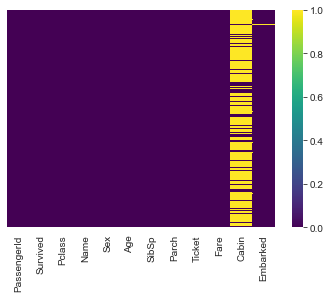

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

Here in the cabin column there are lots of null values so i am going to drop it

In [15]:
df.drop('Cabin',axis=1,inplace=True)
# we use inplace=True for make changes in the real database

Check again the data

<AxesSubplot:>

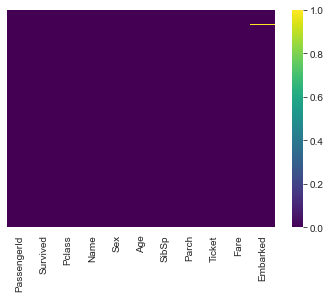

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [17]:
# there are two null valules in embarked so we can drop it
df.dropna(inplace=True)

<AxesSubplot:>

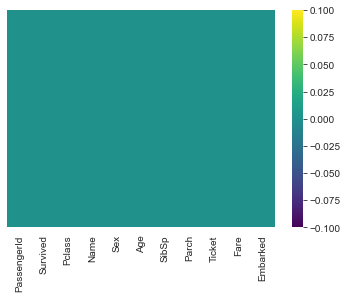

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

Now it is ready for use

In [19]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


# Converting categorical Features

In [20]:
emb=pd.get_dummies(df['Embarked'],drop_first=True)
# drop_first is used for drop the first column 

In [21]:
emb.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [23]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
pclass=pd.get_dummies(df['Pclass'],drop_first=True)

In [25]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [26]:
df=pd.concat([df,sex,pclass,emb],axis=1)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [28]:
x=df.drop(['Pclass','Name','Sex','Ticket','Embarked','Survived'],axis=1)
y=df['Survived']

In [29]:
x.head()

,PassengerId,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,1,22.0,1,0,7.2500,1,0,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,35.0,1,0,53.1000,0,0,0,0,1
4,5,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
# random state is used is use for 

# model preparation

In [33]:
model=LogisticRegression()

In [34]:
model

LogisticRegression()

In [35]:
# model training
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# model testing

In [36]:
y_predict=model.predict(X_test)

In [37]:
y_predict

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
accuracy=confusion_matrix(y_test,y_predict)

In [40]:
accuracy

array([[146,  21],
       [ 31,  69]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
acc_score=accuracy_score(y_test,y_predict)

In [43]:
acc_score

0.8052434456928839